## PyTorch Workflow
1. Data(Prepare and load)
2. Build Model
3. Fitting the model to data (Training)
4. Making predictions and evaluating a model
5. Saving and loading a model

In [4]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [5]:
device = 'cuda' if torch.cuda.is_available() else "cpu"

## 1. Data (Preparing and loading)
Machine Learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

In [9]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [10]:
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

## Splitting data into training and test sets

In [19]:
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

## Visualize the data

In [45]:
def plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None
                     ):
    plt.figure(figsize=(10,7))
    #plot train data
    plt.scatter(train_data, train_labels, c='r', s=5, label="Training data")

    #plot test data
    plt.scatter(test_data, test_labels, c='g', s=5, label="Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c='orange', s=5, label="Predicted data")

    # legends
    plt.legend(prop={"size":14})

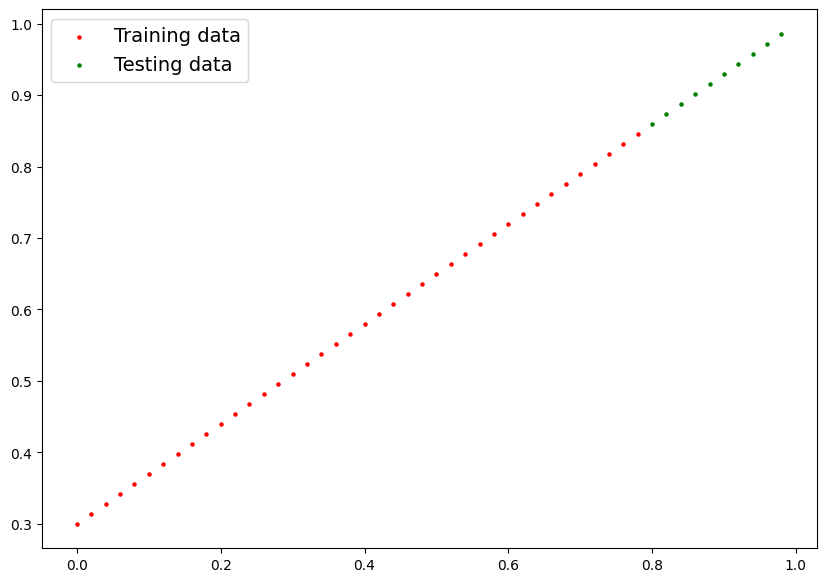

In [46]:
plot_predictions()

## Creating Linear Model

In [33]:
class LinearRegressionModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad = True,
                                                dtype = torch.float32
                                                ))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype= torch.float32))

    # method to define computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


### PyTorch model building essentials
* `torch.nn` - contains all of the buildins for computational graphs
* `torch.nn.Parameters` - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* `torch.nn.Module` - base class for all neural network modules, if you subclass it, you should overwrite forward()
* `torch.optim` - this is where the optimizers in PyTorch live, they will help with gradient descent

In [35]:
# create a random see
torch.manual_seed(42)

# create instance of model

model_0 = LinearRegressionModel()

In [39]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [40]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Making Prediction with our model

In [48]:
# inference mode stops keeping track of gradient
with torch.inference_mode():
    y_preds = model_0(X_test)

In [49]:
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

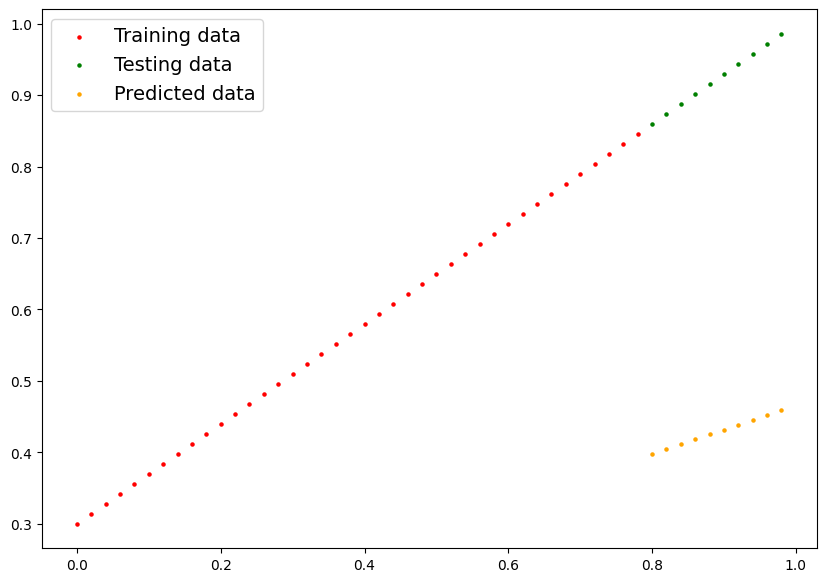

In [50]:
plot_predictions(predictions=y_preds)

 ### Training the model
For pytorch, we need
1. Training Loop
2. Testing Loop

In [54]:
# setting a loss function
loss_fn = nn.L1Loss()

#setting an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01
                            )

### Building a training loop and testing loop in PyTorch
1. Loop through the data
2. Forward pass
3. Calculate the loss
4. Optimizer zero grad
5. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (back propagation)
6. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (gradient descent)

In [70]:
epochs = 200

# loop through the data
for epoch in range(epochs):
    # set the model to training mode
    model_0.train() # train mode in PyTorch sets all parametes that requires gradient to require gradients

    # forward pass
    y_pred = model_0(X_train)

    # calculate loss
    loss = loss_fn(y_pred, y_train)
    print(f"Loss: {loss}")

    # optimizer zero grad
    optimizer.zero_grad()

    # loss backward (back propagation)
    loss.backward()

    # step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will accumulate through the loop. so we have to zero them in grad_zero() for the next interation of loop


    model_0.eval() # turns off gradient tracking


Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Loss: 0.008932482451200485
Loss: 0.0025885067880153656
Loss: 0.00

In [71]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [72]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

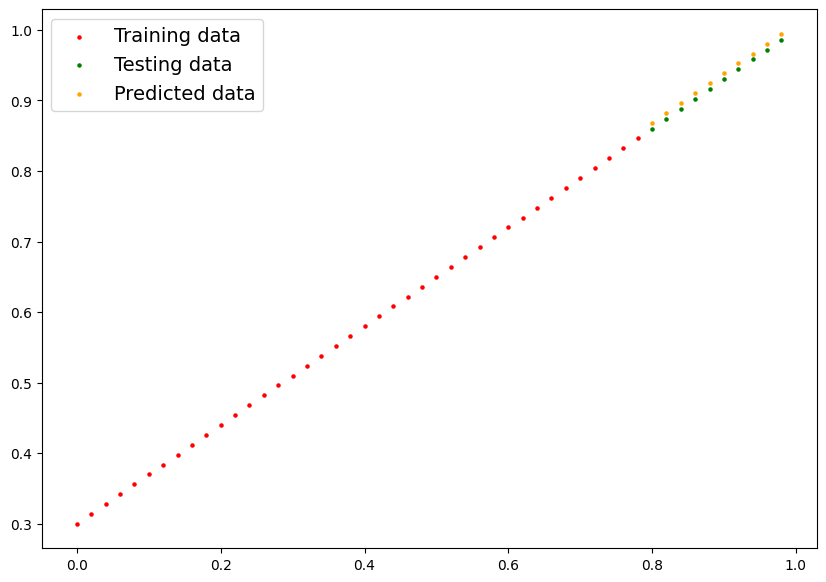

In [73]:
plot_predictions(predictions=y_preds_new)